<a href="https://colab.research.google.com/github/kaalachor/Elections-in-India/blob/master/Election_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset and Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Previewing the dataset in a pandas dataframe.


In [ ]:
dataset = pd.read_csv('LS_2.0.csv')
dataset

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,TOTAL\nVOTES,TOTAL ELECTORS
0,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13036,1489790
1,Telangana,ADILABAD,RATHOD RAMESH,0,INC,MALE,3,52.0,ST,12th Pass,3.649100e+07,15300000.0,314238,1489790
2,Telangana,ADILABAD,Godam Nagesh,0,TRS,MALE,0,54.0,ST,Post Graduate,1.847789e+07,847000.0,318814,1489790
3,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,MALE,52,52.0,ST,12th Pass,3.099414e+06,231450.0,377374,1489790
4,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,MALE,0,47.0,SC,Post Graduate,1.337844e+08,22251891.0,435329,1937690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2258,Maharashtra,YAVATMAL-WASHIM,Vaishali Sudhakar Yede,0,PHJSP,FEMALE,0,28.0,GENERAL,10th Pass,1.168500e+06,9000.0,20620,1916185
2259,Telangana,ZAHIRABAD,B.B.PATIL,1,TRS,MALE,18,63.0,GENERAL,Graduate,1.287852e+09,11535000.0,434244,1498666
2260,Telangana,ZAHIRABAD,MADAN MOHAN RAO,0,INC,MALE,0,49.0,GENERAL,Post Graduate,9.036630e+08,0.0,428015,1498666
2261,Telangana,ZAHIRABAD,BANALA LAXMA REDDY,0,BJP,MALE,3,47.0,GENERAL,12th Pass,5.857733e+07,5250000.0,138947,1498666


In [ ]:
dataset.shape

(2263, 14)

Our dataset has 2264  rows and 14 columns

## Analysing the data

The dataset has the following columns.

In [ ]:
dataset.columns

Index(['STATE', 'CONSTITUENCY', 'NAME', 'WINNER', 'PARTY', 'GENDER',
       'CRIMINAL\nCASES', 'AGE', 'CATEGORY', 'EDUCATION', 'ASSETS',
       'LIABILITIES', 'TOTAL\nVOTES', 'TOTAL ELECTORS'],
      dtype='object')

The null values depict the missing values in case of NOTA candidates.

In [ ]:
dataset.isnull().sum(axis = 0)

STATE                0
CONSTITUENCY         0
NAME                 0
WINNER               0
PARTY                0
GENDER             245
CRIMINAL\nCASES    245
AGE                245
CATEGORY           245
EDUCATION          245
ASSETS               0
LIABILITIES          0
TOTAL\nVOTES         0
TOTAL ELECTORS       0
dtype: int64

FIlling the unavailable values with 0 in Assets and Liabilities

In [ ]:
dataset['ASSETS'] = dataset['ASSETS'].fillna(0)
dataset['ASSETS']

0       0.000000e+00
1       3.649100e+07
2       1.847789e+07
3       3.099414e+06
4       1.337844e+08
            ...     
2258    1.168500e+06
2259    1.287852e+09
2260    9.036630e+08
2261    5.857733e+07
2262    0.000000e+00
Name: ASSETS, Length: 2263, dtype: float64

In [ ]:
dataset['LIABILITIES'] = dataset['LIABILITIES'].fillna(0)
dataset['LIABILITIES']

0              0.0
1       15300000.0
2         847000.0
3         231450.0
4       22251891.0
           ...    
2258        9000.0
2259    11535000.0
2260           0.0
2261     5250000.0
2262           0.0
Name: LIABILITIES, Length: 2263, dtype: float64

Information about rows and columns

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   STATE           2263 non-null   object 
 1   CONSTITUENCY    2263 non-null   object 
 2   NAME            2263 non-null   object 
 3   WINNER          2263 non-null   int64  
 4   PARTY           2263 non-null   object 
 5   GENDER          2018 non-null   object 
 6   CRIMINAL
CASES  2018 non-null   object 
 7   AGE             2018 non-null   float64
 8   CATEGORY        2018 non-null   object 
 9   EDUCATION       2018 non-null   object 
 10  ASSETS          2263 non-null   float64
 11  LIABILITIES     1995 non-null   float64
 12  TOTAL
VOTES     2263 non-null   int64  
 13  TOTAL ELECTORS  2263 non-null   int64  
dtypes: float64(3), int64(3), object(8)
memory usage: 247.6+ KB


## Data Insights

Total Constituencies 

In [ ]:
list_of_constituencies = dataset['CONSTITUENCY'].unique()
len(list_of_constituencies)

539

Constituencies per State

In [ ]:
constituencies_per_state = dataset.groupby('STATE')['CONSTITUENCY'].nunique().reset_index().sort_values('CONSTITUENCY',ascending = False)
constituencies_per_state

,STATE,CONSTITUENCY
33,Uttar Pradesh,80
19,Maharashtra,48
35,West Bengal,42
4,Bihar,40
30,Tamil Nadu,38
18,Madhya Pradesh,29
15,Karnataka,28
10,Gujarat,26
28,Rajasthan,25
1,Andhra Pradesh,25


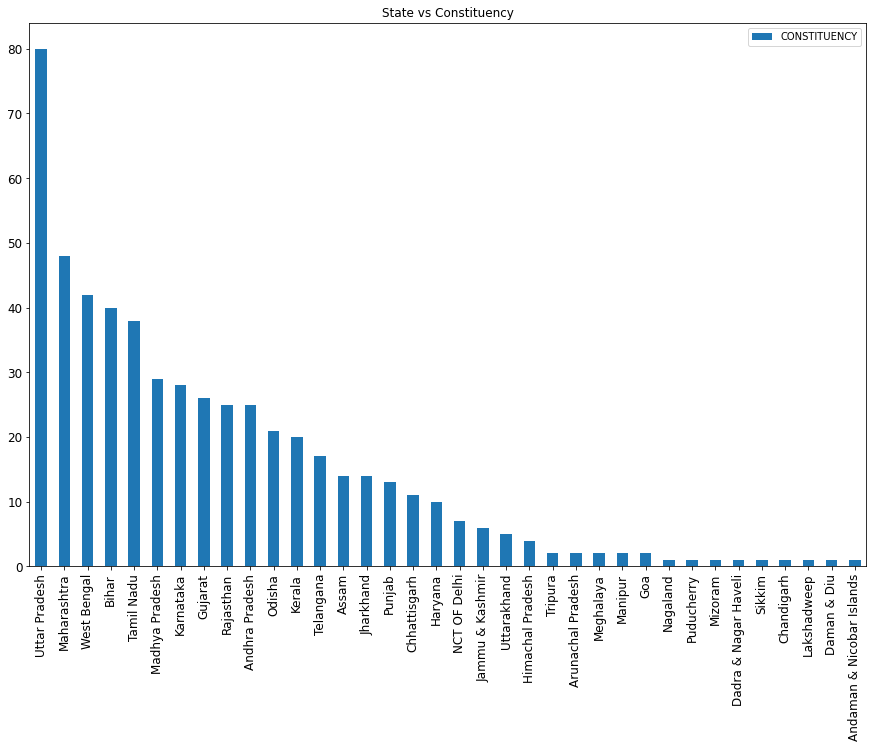

In [ ]:
ax = constituencies_per_state[['STATE','CONSTITUENCY']].plot(kind='bar', title ="State vs Constituency", figsize=(15, 10), legend=True, fontsize=12).set_xticklabels(constituencies_per_state['STATE'])